In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
data = pd.read_csv('po2_data.csv')

In [13]:
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 subject#          0
age               0
sex               0
test_time         0
motor_updrs       0
total_updrs       0
jitter(%)         0
jitter(abs)       0
jitter(rap)       0
jitter(ppq5)      0
jitter(ddp)       0
shimmer(%)        0
shimmer(abs)      0
shimmer(apq3)     0
shimmer(apq5)     0
shimmer(apq11)    0
shimmer(dda)      0
nhr               0
hnr               0
rpde              0
dfa               0
ppe               0
dtype: int64


In [14]:
data.dropna(inplace=True)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


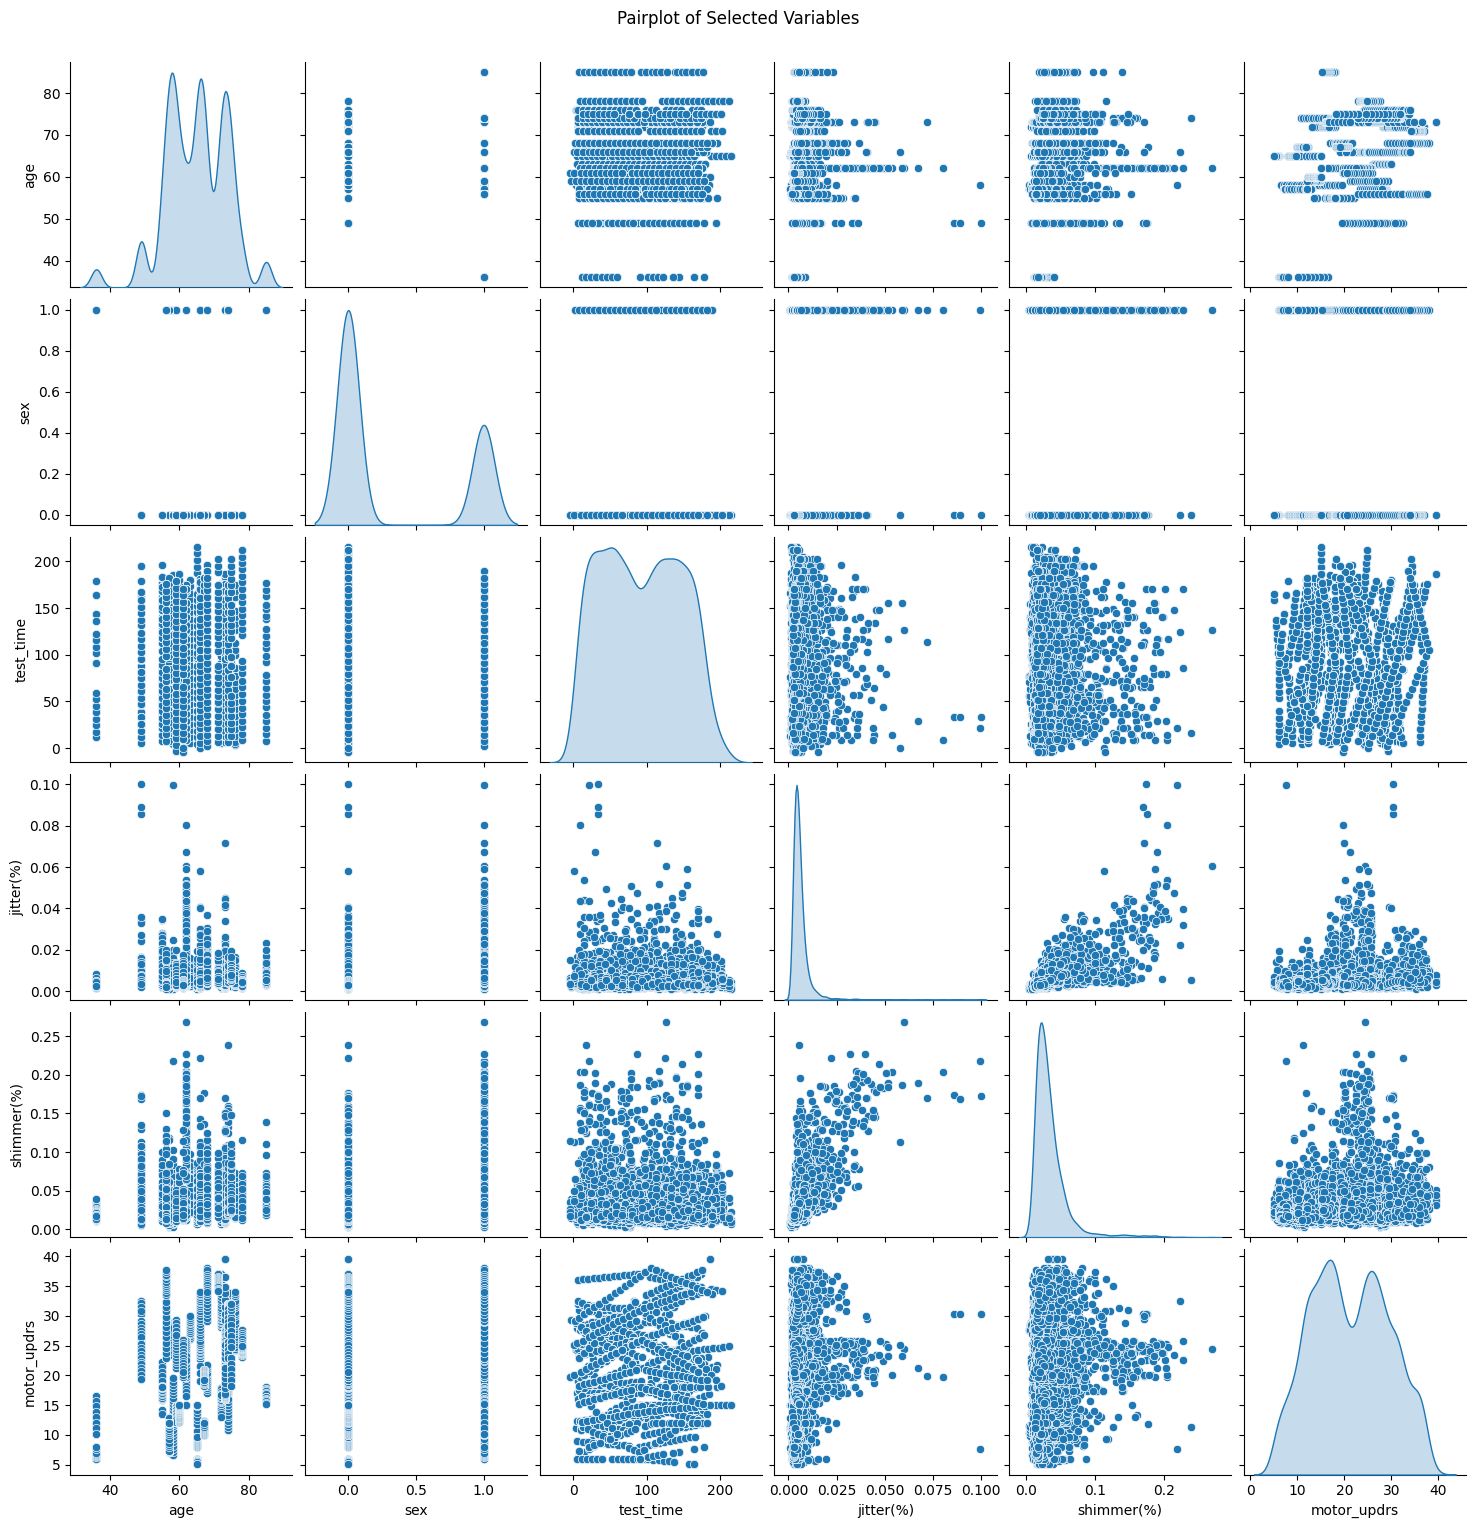

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns you want to plot
selected_columns = ["age", "sex", "test_time", "jitter(%)", "shimmer(%)", "motor_updrs"]

# Create a new DataFrame with the selected columns
selected_data = data[selected_columns]

# Create a pairplot
sns.pairplot(selected_data, diag_kind='kde', kind='scatter')
plt.suptitle("Pairplot of Selected Variables", y=1.02)
plt.show()

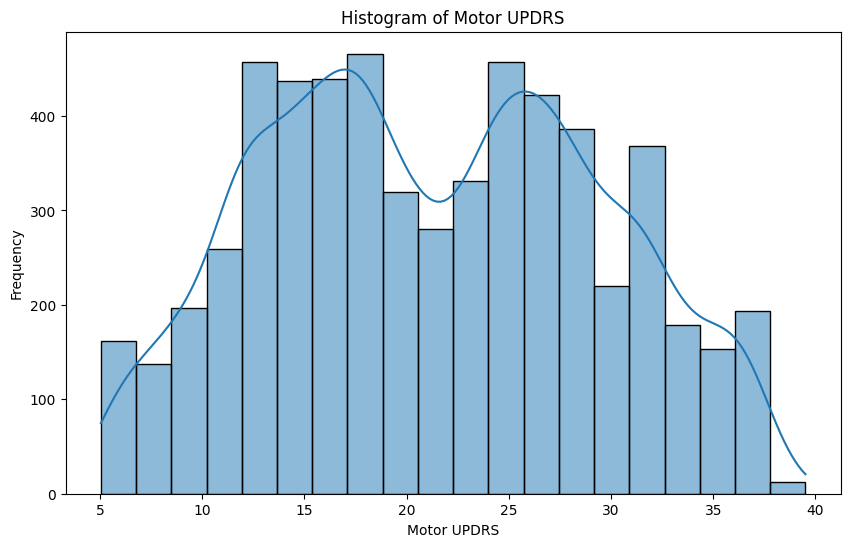

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='motor_updrs', bins=20, kde=True)
plt.title('Histogram of Motor UPDRS')
plt.xlabel('Motor UPDRS')
plt.ylabel('Frequency')
plt.show()

In [18]:
selected_features = ["age", "sex", "test_time", "jitter(%)", "shimmer(%)", "nhr", "hnr", "rpde", "dfa", "ppe"]


Motor UPDRS Model:
RMSE: 1.5478947968210381
MAE: 0.6029948604255331
R-squared: 0.962462676476089

Total UPDRS Model:
RMSE: 1.7705519746148288
MAE: 0.7022791702127646
R-squared: 0.97171042143718


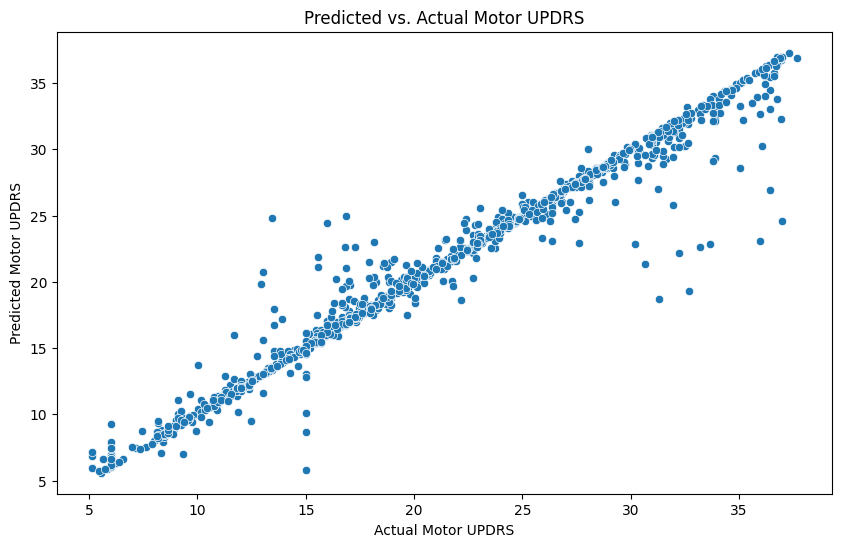

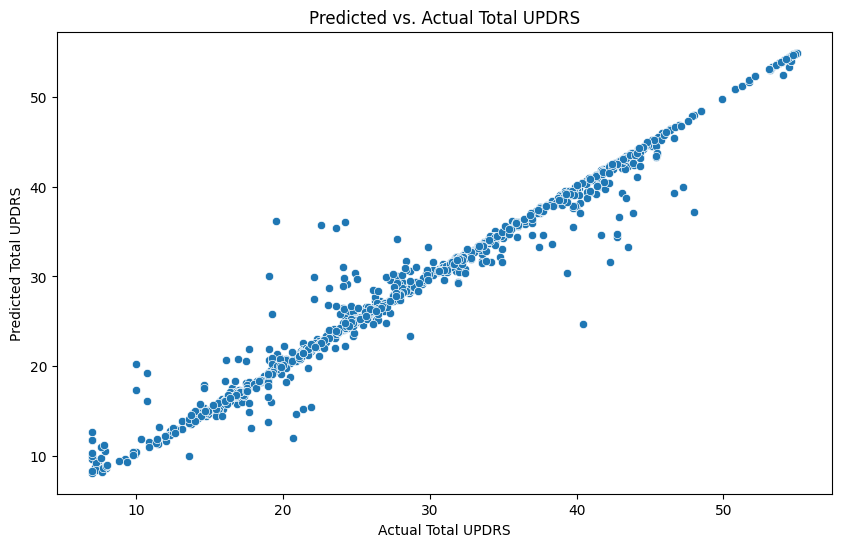

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
X = data[selected_features]
y_motor = data["motor_updrs"]
y_total = data["total_updrs"]

# Split the data into training and testing sets
X_train, X_test, y_motor_train, y_motor_test, y_total_train, y_total_test = train_test_split(
    X, y_motor, y_total, test_size=0.2, random_state=42
)

# Create Random Forest Regressor models for 'motor_updrs' and 'total_updrs'
motor_updrs_model = RandomForestRegressor(n_estimators=100, random_state=42)
total_updrs_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the models to the training data
motor_updrs_model.fit(X_train, y_motor_train)
total_updrs_model.fit(X_train, y_total_train)

# Make predictions on the test set
y_motor_pred = motor_updrs_model.predict(X_test)
y_total_pred = total_updrs_model.predict(X_test)

# Evaluate model performance
motor_updrs_rmse = mean_squared_error(y_motor_test, y_motor_pred, squared=False)
motor_updrs_r2 = r2_score(y_motor_test, y_motor_pred)
total_updrs_rmse = mean_squared_error(y_total_test, y_total_pred, squared=False)
total_updrs_r2 = r2_score(y_total_test, y_total_pred)

mae_motor = mean_absolute_error(y_motor_test, y_motor_pred)
mae_total = mean_absolute_error(y_total_test, y_total_pred)

print("Motor UPDRS Model:")
print(f"RMSE: {motor_updrs_rmse}")
print(f"MAE: {mae_motor}")
print(f"R-squared: {motor_updrs_r2}")
print("\nTotal UPDRS Model:")
print(f"RMSE: {total_updrs_rmse}")
print(f"MAE: {mae_total}")
print(f"R-squared: {total_updrs_r2}")

# Visualize predictions vs. actual values for 'motor_updrs'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_motor_test, y=y_motor_pred)
plt.title('Predicted vs. Actual Motor UPDRS')
plt.xlabel('Actual Motor UPDRS')
plt.ylabel('Predicted Motor UPDRS')
plt.show()

# Visualize predictions vs. actual values for 'total_updrs'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_total_test, y=y_total_pred)
plt.title('Predicted vs. Actual Total UPDRS')
plt.xlabel('Actual Total UPDRS')
plt.ylabel('Predicted Total UPDRS')
plt.show()